In [ ]:
# PRUEBA GRAFICOS 3D

# Creamos la figura
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Definimos los datos de prueba
x = [1,2,3,4,5,6,7,8,9,10]
y = [5,6,7,8,2,5,6,3,7,2]
z = [1,2,6,3,2,7,3,3,7,2]

# Datos adicionales
x2 = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10]
y2 = [-5,-6,-7,-8,-2,-5,-6,-3,-7,-2]
z2 = [1,2,6,3,2,7,3,3,7,2]

# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, c='g', marker='o')
ax1.scatter(x2, y2, z2, c ='r', marker='o')

# Mostramos el gráfico
plt.show()

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import axes3d
from scipy.integrate import odeint

# Funciones generales

In [ ]:
def simulate_2d(x0,y0, next):
    x = x0
    y = y0

    x_values = [x]
    y_values = [y]

    for i in range(0,50):
        x,y = next(x,y)
        x_values.append(x)
        y_values.append(y)

    return (x_values, y_values)


def simulate_3d(x0,y0,z0,next):
    x = x0
    y = y0
    z = z0

    x_values = [x]
    y_values = [y]
    z_values = [z]

    for i in range(0,50):
        x,y,z = next(x,y,z)
        x_values.append(x)
        y_values.append(y)
        z_values.append(z)

    return (x_values, y_values, z_values)

# Apunte - comportamiento en puntos fijos


## Sistemas Lineales

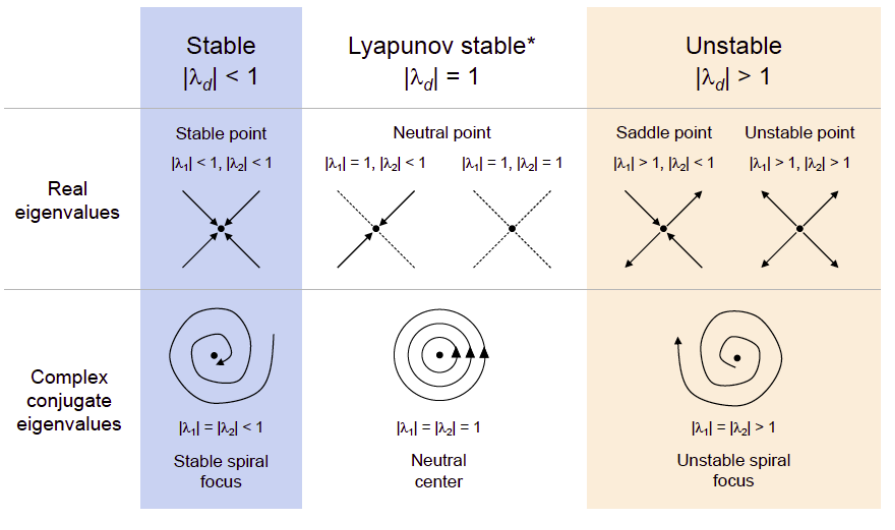

## Sistemas No-Lineales

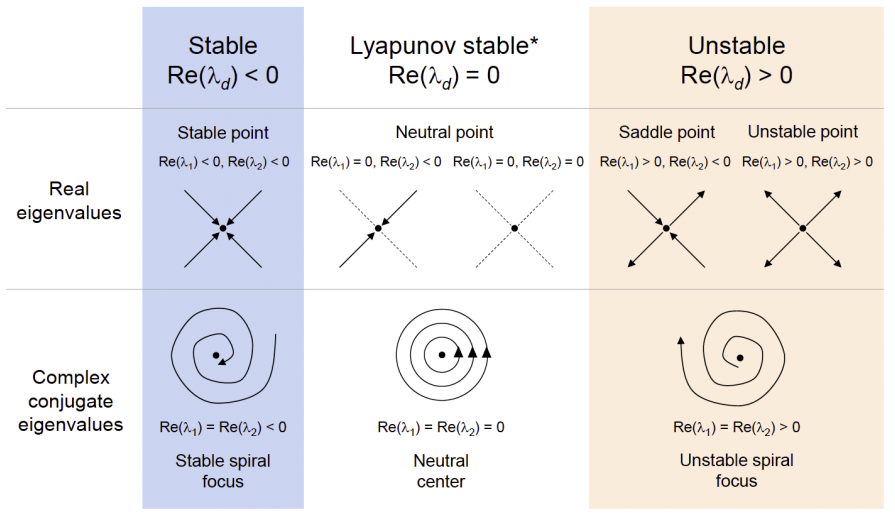

# Sistemas Dinamicos Lineales (Tiempo Discreto)

## Ejemplo:
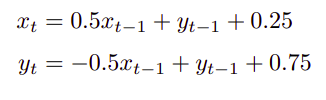

Si resolvemos el sistema vemos que hay un punto fijo en:
$$
(1.5,0.5)
$$

Además, si buscamos los autovalores de la matriz del sistema tenemos que:
$$
\lambda_1 = \frac{3}{4} + \frac{\sqrt{7}}{4}i
\\
\lambda_2 = \frac{3}{4} - \frac{\sqrt{7}}{4}i
$$

<br>
Vemos que: $ |\lambda_1| = |\lambda_2| = 1$

Por lo tanto, el comportamiento del punto fijo se trata de un ciclo limite pudiendo observar trayectorias ovaladas alrededor del punto fijo. Comprobemoslo.

In [ ]:
def f1(prevX, prevY):
    x = 0.5 * prevX + prevY + 0.25
    y = -0.5 * prevX + prevY + 0.75

    return (x,y)

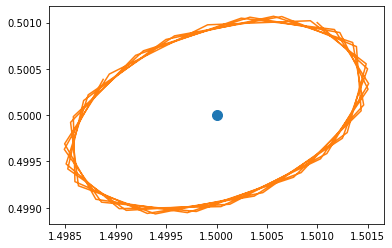

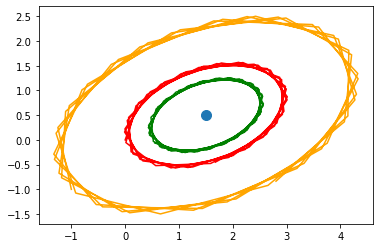

In [ ]:
x,y = simulate_2d(1.5, 0.5, f1)
x2,y2 = simulate_2d(1.501, 0.501, f1)
x3,y3 = simulate_2d(0, 0, f1)
x4,y4 = simulate_2d(1., 1., f1)
x5,y5 = simulate_2d(-1., -1., f1)

plt.plot(1.5,0.5, marker="o", markersize = 10)
plt.plot(x2, y2)
plt.show()

plt.plot(1.5,0.5, marker="o", markersize = 10)
plt.plot(x3, y3,color="red")
plt.plot(x4, y4,color="green")
plt.plot(x5, y5,color="orange")
plt.show()

## Otro ejemplo:
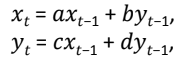

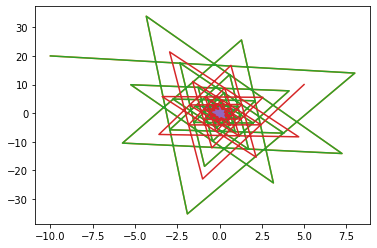

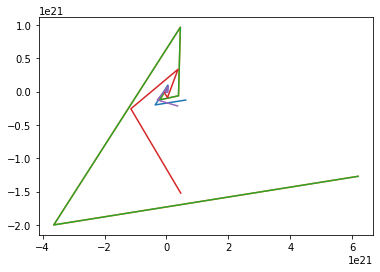

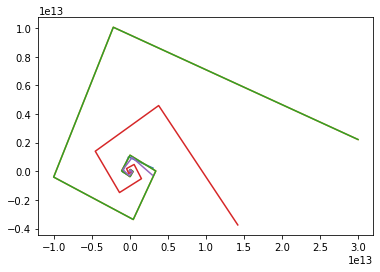

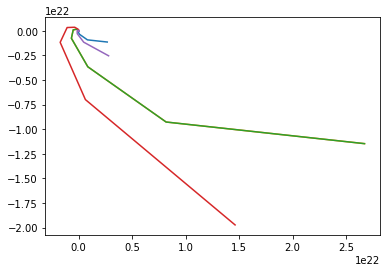

In [ ]:
def f2(prevX, prevY):
    x = a*prevX + b*prevY
    y = c*prevX + d*prevY

    return (x,y)

for params in [[-0.5,0.15,-3, -0.8],[0.5,-4,2,-3],[0.1,3,-1,0],[1,-2,2,3]]:
    a = params[0]
    b = params[1]
    c = params[2]
    d = params[3]

    x,y = simulate_2d(-1,2,f2)
    x2,y2= simulate_2d(-10,20,f2)
    x3,y3 = simulate_2d(-10,20,f2)
    x4,y4 = simulate_2d(5,10,f2)
    x5,y5 = simulate_2d(0,2,f2)
    # plt.plot(1.5,0.5, marker="o", markersize = 10)
    plt.plot(x, y)
    plt.plot(x2, y2)
    plt.plot(x3, y3)
    plt.plot(x4, y4)
    plt.plot(x5, y5)
    # plt.plot(x4, y4,color="green")
    # plt.plot(x5, y5,color="orange")
    plt.show()




# Sistemas No-Lineales (Tiempo Discreto)

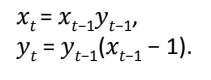

In [ ]:
def f3(prevX, prevY):
    x = prevX * prevY
    y = prevY * (prevX - 1)

    return (x,y)

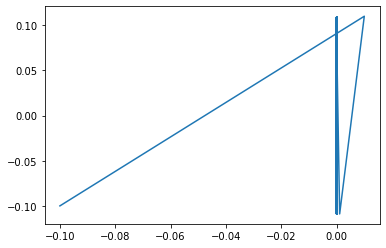

In [ ]:
domain = np.linspace(-10, 10, 5)

# for x0 in domain:
#     for y0 in domain:
#         print(x0,y0)
#         x,y = simulate_2d(x0, y0, f3)
#         plt.plot(x, y,)

x,y = simulate_2d(-0.1,-0.1, f3)
plt.plot(x, y)
plt.show()
# x,y = simulate_2d(1.5, 0.5, f1)
# x2,y2 = simulate_2d(1.501, 0.501, f1)
# x3,y3 = simulate_2d(0, 0, f1)
# x4,y4 = simulate_2d(1., 1., f1)
# x5,y5 = simulate_2d(-1., -1., f1)

# plt.plot(1.5,0.5, marker="o", markersize = 10)
# plt.plot(x2, y2)
# plt.show()

# plt.plot(1.5,0.5, marker="o", markersize = 10)
# plt.plot(x3, y3,color="red")
# plt.plot(x4, y4,color="green")
# plt.plot(x5, y5,color="orange")
# plt.show()

# Sistemas No-Lineales (Tiempo Continuo)

## Modelo Predador-Presa Lotka-Volterra
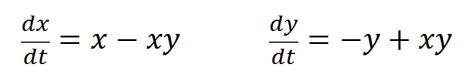

Puntos fijos:
* $(0,0)$: Punto fijo inestable (Saddle point)
    * $\lambda_1=Re(\lambda_1)=1$
    * $\lambda_2=Re(\lambda_2)=-1$
* $(1,1)$: Punto fijo estable (Lyapunov)
    * $\lambda_1=i \rightarrow Re(\lambda_1)=0$ 
    * $\lambda_2=-i \rightarrow Re(\lambda_2)=0$




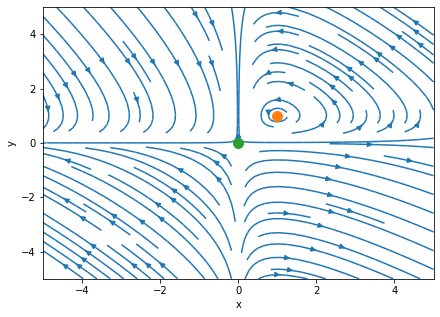

In [ ]:
a = 5
Y, X = np.mgrid[-a:a:100j, -a:a:100j] 
U = X-X*Y
V = X*Y-Y

fig = plt.figure(figsize = (7, 5)) 
plt.streamplot(X, Y, U, V, density = 1)
plt.plot(1,1,marker="o", markersize=10)
plt.plot(0,0,marker="o", markersize=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

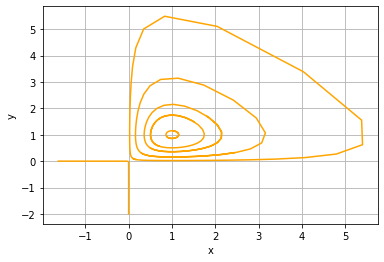

<Figure size 360x144 with 0 Axes>

In [ ]:
# Definimos el sistema de ecuaciones
def ecuaciones(U,t):
    x, y = U

    dxdt = x-x*y
    dydt = x*y-y

    return [dxdt, dydt]

# Creamos el array de tiempos
time = np.linspace(0, 10)

solutions = []

# Cada iteracion representa la trayectoria comenzando en un punto determinado (cond. inicial)
for U in [[-0.00001, -2],[0,0],[0.1,0.1],[0.3,0.3],[0.5,0.5],[0.9,0.9],[1,1],[1.5,1.5]]:
    x0 = U[0]
    y0 = U[1]

    U0 = [x0, y0]

    # Resuelvo el sistema de ecuaciones con la c.i correspondiente a esta iteracion
    solutions.append(odeint(ecuaciones, U0, time)) 

for solution in solutions:
    plt.plot([item[0] for item in solution], [item[1] for item in solution], 'orange')

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
fig = plt.figure(figsize = (5, 2)) 
plt.show()

Vemos que cuando la condición inicial es cercana al (1,1), se forman trayectorias elipticas dado a que dicho punto fijo era estable de Lyapunov

## Modelo Péndulo simple
$ \frac{d^2\theta}{dt^2} = - \frac{g}{L} sin(\theta) - k \frac{d\theta}{dt}$

Primero lo convertimos en un sistema de primer orden planteando:

$\frac{d\theta}{dt} = ω$
<br>
$ \frac{d\omega}{dt} = - \frac{g}{L} sin(\theta) - k \omega$

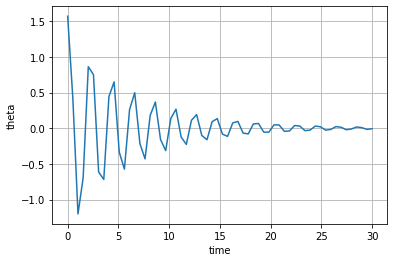

<Figure size 360x144 with 0 Axes>

In [ ]:
g = 9.8
L = 1
k = 0.3
U0 = [math.pi/2,0]

time = np.linspace(0, 30, 60)

def ecuacion(U,t):
    theta, w = U

    dthetadt = w
    dwdt = -(g/L) * math.sin(theta) - k * w
    
    return [dthetadt, dwdt]

solution = odeint(ecuacion, U0, time)

plt.plot(time, [item[0] for item in solution])
plt.xlabel('time')
plt.ylabel('theta')
plt.grid(True)
fig = plt.figure(figsize = (5, 2)) 
plt.show()

# Caos

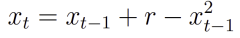

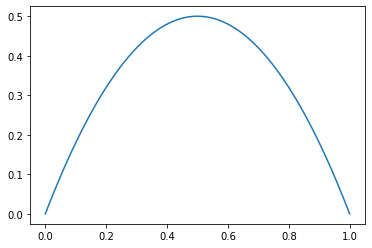

In [ ]:
r = 2

def mapa_logistico(x):
    return r*x*(1-x)

x_values = np.linspace(0, 1, 100)
y_values = [mapa_logistico(x) for x in x_values]
plt.plot(x_values, y_values)
plt.show()

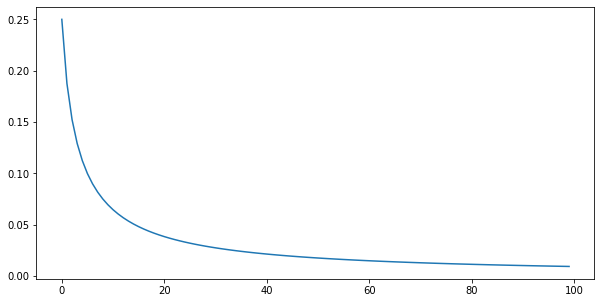

In [ ]:
r = 1
x_values = []
i_values = []
x = 0.5
for i in range(0,100):
    # x = r*x*(1-x)
    x= r*x*(1-x)
    x_values.append(x)
    i_values.append(i)

fig = plt.figure(figsize = (10, 5)) 
plt.plot(i_values, x_values)
plt.show()

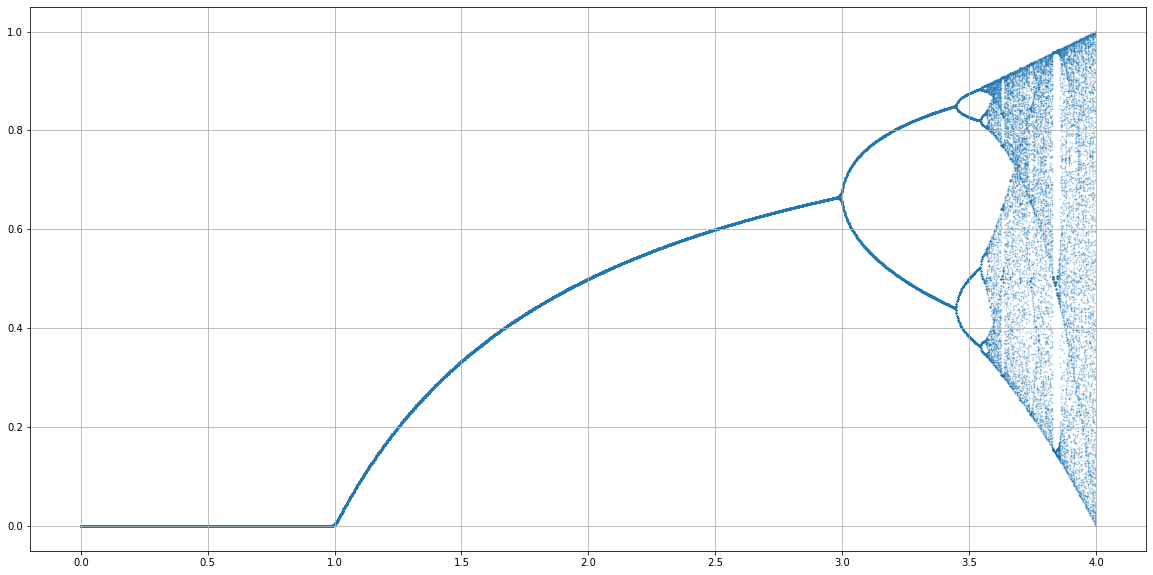

In [ ]:
r_values = np.arange(0,4,0.0025)
x_values = []
r_values2 = []

fig = plt.figure(figsize = (20, 10)) 
plt.grid(True)

for r in r_values:
    #Condicion inicial
    x = 0.1

    #Dejo correr las primeras 200 iteraciones para que el sistema se estabilice
    for i in range(0,200):
        x= round(r*x*(1-x),15)

    #Me quedo con los valores que toma en las proximas 100 iteraciones (puntos fijos) 
    for i in range(0,100):
        x= round(r*x*(1-x),15)
        x_values.append(x)
    r_values2 += [r]*100

plt.scatter(r_values2, x_values, marker="o", s=0.5, alpha=0.3)
plt.show()

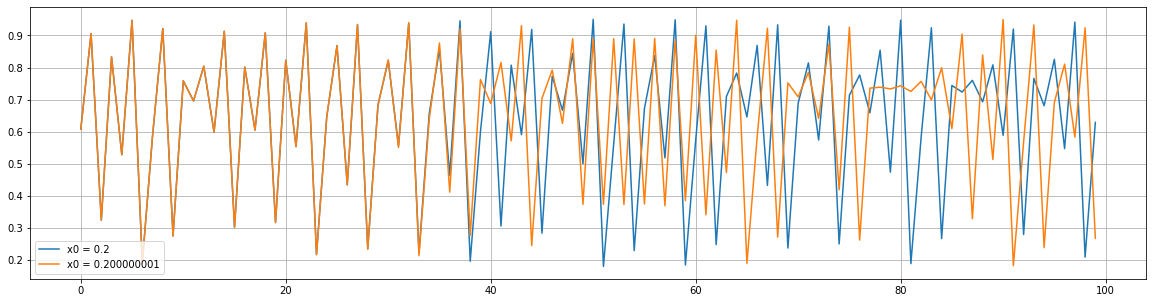

In [ ]:
x_values = []
x_values2 = []

fig = plt.figure(figsize = (20, 5)) 
plt.grid(True)

r = 3.8
x=0.2
x2 = 0.200000001
for i in range(100):
    x= r*x*(1-x)
    x2 = r*x2*(1-x2)
    x_values.append(x)
    x_values2.append(x2)

plt.plot(np.arange(0,100,1), x_values, label="x0 = 0.2")
plt.plot(np.arange(0,100,1), x_values2, label="x0 = 0.200000001")
plt.legend(loc="lower left")
# plt.xlim(50)
plt.show()

Para $r=3.8$ vemos en el diagrama de bifurcaciones que ya hay caos. Entonces, utilizando este $r$ con la fórmula del mapa logístico $x_{n} = r x_{n-1}(1-x_{n-1})$, vemos que se cumple la sensibilidad a condiciones iniciales.
<br>
Si comenzamos con $x_0 = 0.2$ y $x_0=0.200000001$ vemos que al comienzo el comportamiento es idéntico, sin embargo, luego de algunas iteraciones el comportamiento comienza a volverse totalmente diferente.

Esta sensibilidad a las condiciones iniciales, propia de los sistemas que presentan caos, es conocida también como el "Efecto mariposa"